<a href="https://colab.research.google.com/github/dishapalan02/AI-Enabled-IT-Service-Ticketing-tool/blob/Develop_Disha/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Enabled IT Ticketing Service Tool 

# 1. PROBLEM STATEMENT 

In any of the IT industry, incident management plays an important role in delivering quality and timely support to its customers across the globe.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

L1 / L2 needs to spend time to review Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum 25–30% of incidents needs to be reviewed for SOPs before ticket assignment).  

15 mins are being spent for SOP review for each incident. Minimum of 1 FTE effort needed only for incident assignment to L3 teams.  

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.  

Around 25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups 

During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service and loss of business.




# 2. OBJECTIVE

We are building an AI solution which will enable organizations to classify incidents to the right functional group by implementing the best suited machine learning model and leading to customer satisfaction. 

Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome and save time with below losses:

1. Time latency sue to review of SOPs before assigning to right functional group 
2. Incorrect assignments to functional groups
3. #ToDo ( Include figures for losses and revenue ) --> to be checked by Gloria 

# 3. SOLUTION

ToDo ( Add the different approches taken )

## 3.1 EDA

## 3.1.1 Install the required libraries

In [1]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 208kB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 3.9MB/s 
     |████████████████████████████████| 3.1MB 20.5MB/s 
     |████████████████████████████████| 1.1MB 40.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 296kB 39.4MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=dec88aa6a9c8afa98ef19ba30023a2e40f04d1ad4d05a122b52a2b9504f55090
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=c56602d0bb8e0d223145caa4eecd4f9cc64cb36b1ab74f700c30f91138888d07
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pa

### 3.1.2 Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline


## 3.1.2 Import the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

In [6]:
# Check the first 5 rows of data
incidents_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## 3.1.3 Visualizing and analysing the data 

3.1.3.1 Report visualization using SweetViz

                                             |          | [  0%]   00:00 -> (? left)

Report Incidents_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



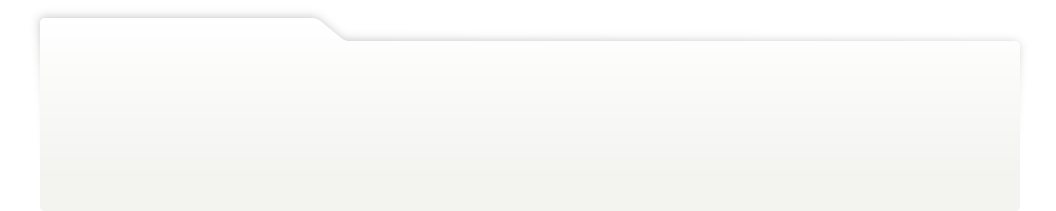
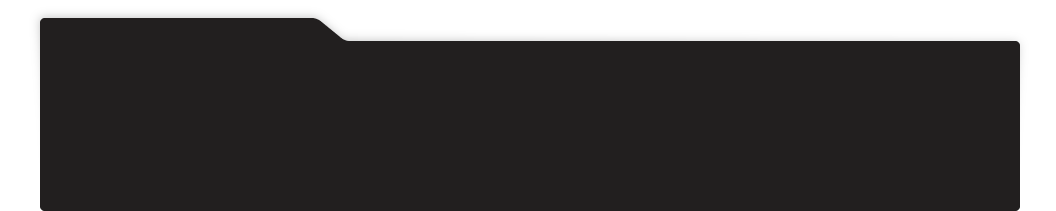
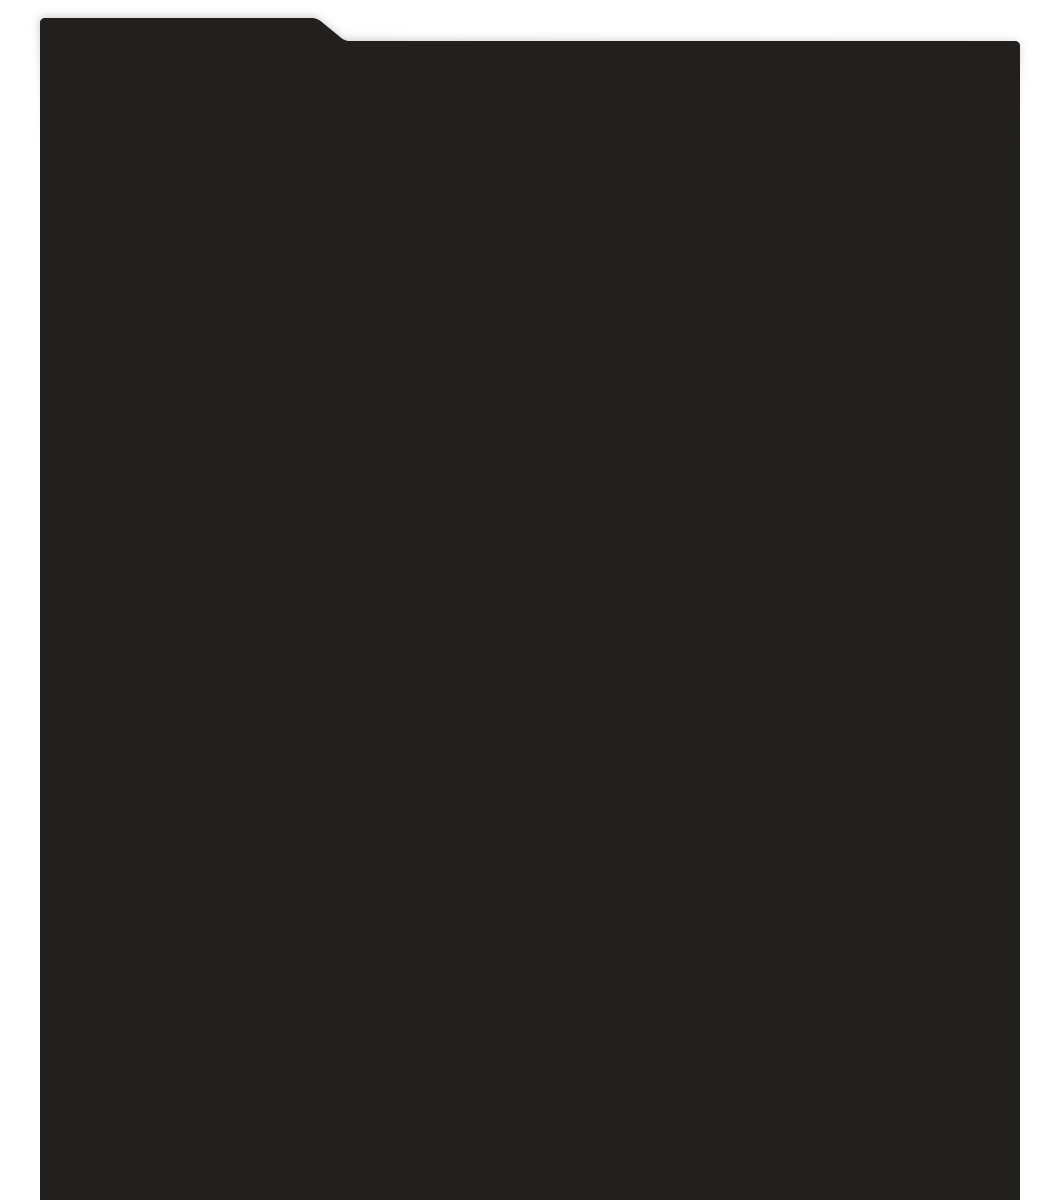
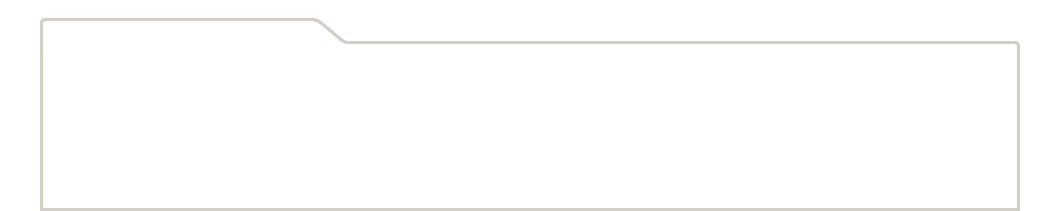
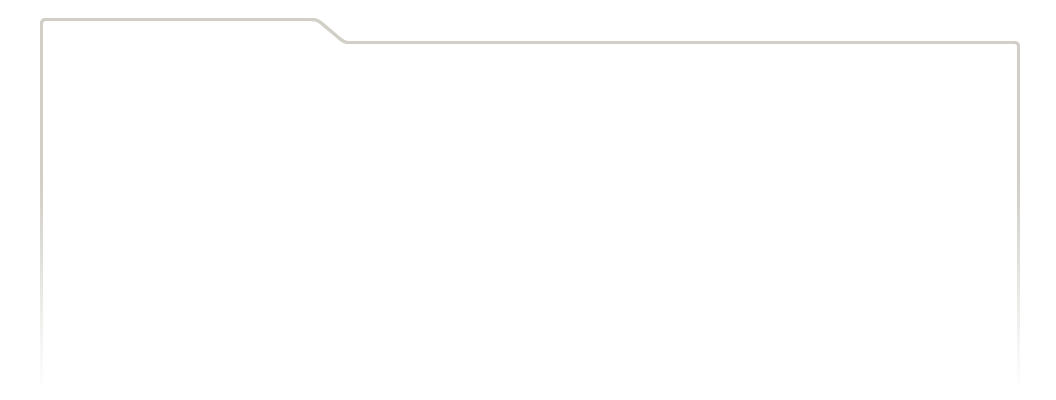
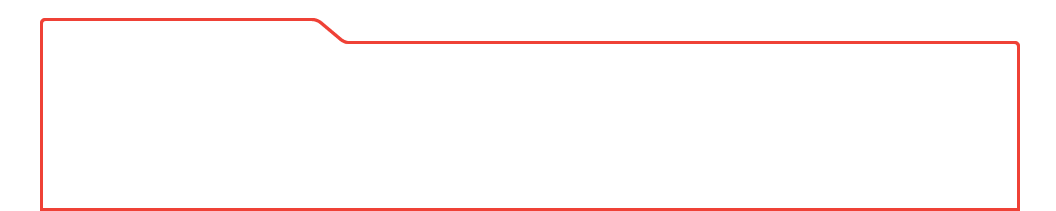
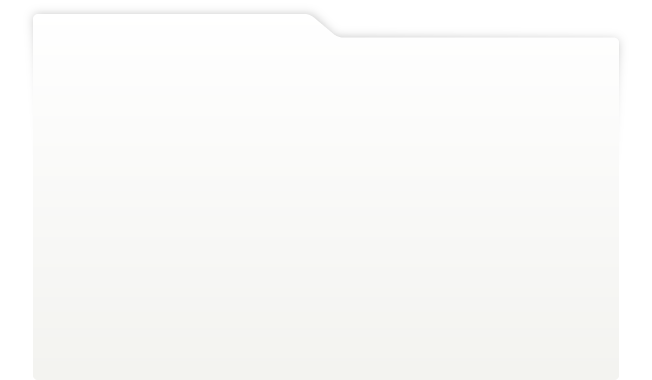
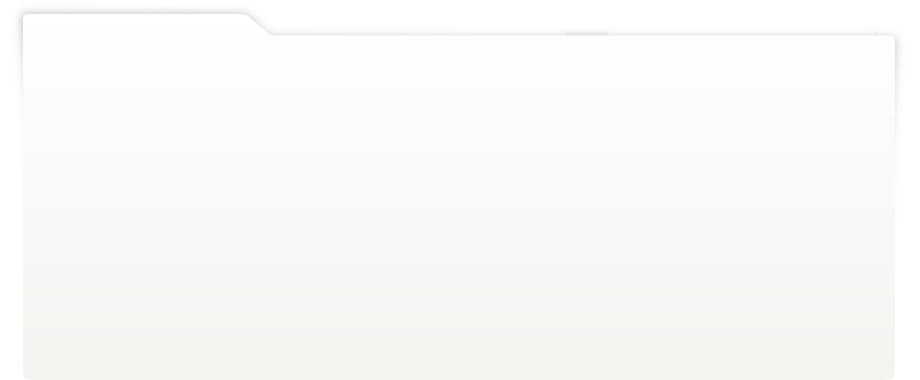
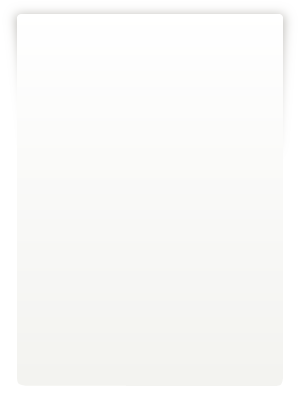
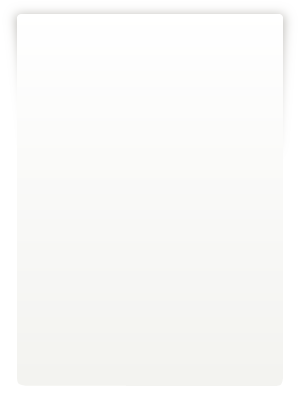
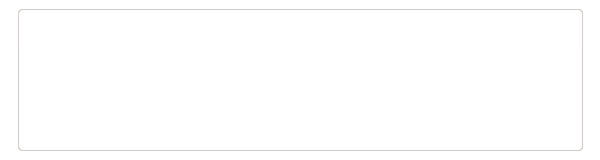
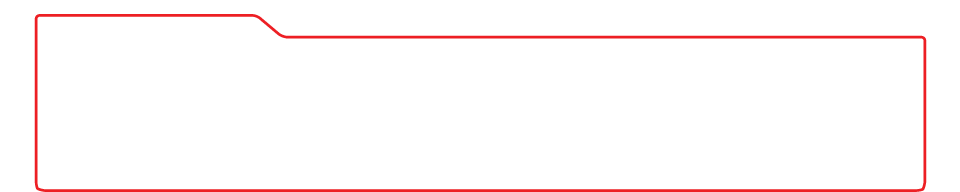
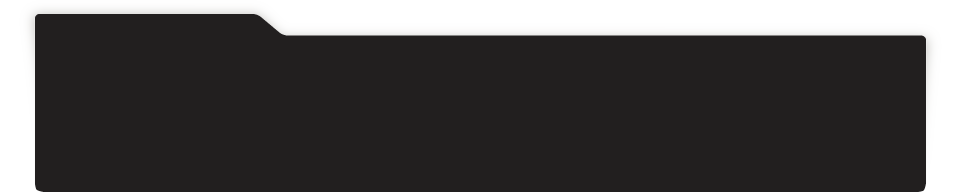
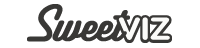
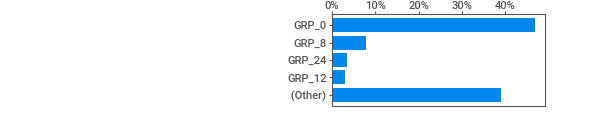
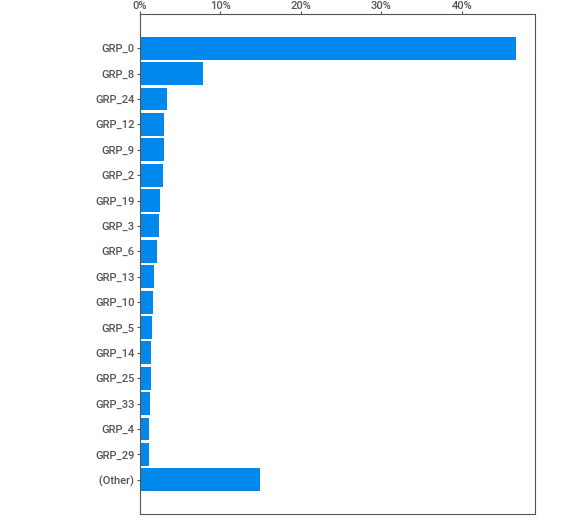
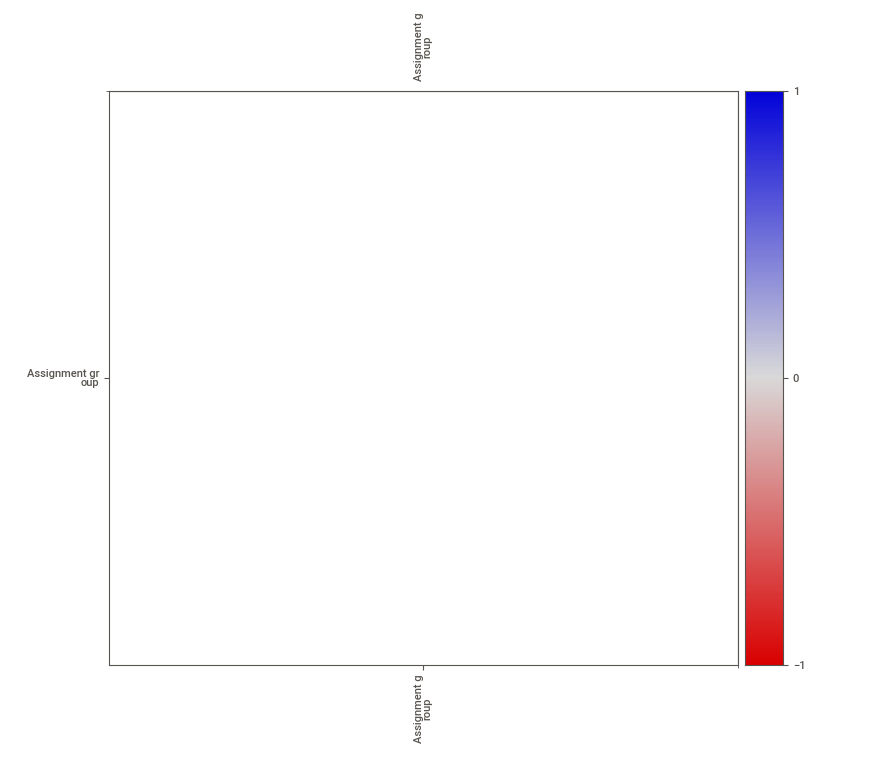
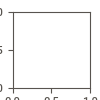

In [7]:
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents_sweetviz_report.html')
incidents_report.show_notebook()

3.1.3.2 Report visualization using Pandas Profiling

In [8]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='Incidents_pandas_profiling_report.html')
incident_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

3.1.3.3 Observations from SweetViz and Pada Profiling reports above

From Above two reports we have below onservations: 
1. Shape of the data - { Rows : 8500, Columns : 4 }
2. Total features - 3
    
    2.1. Short Description - Text

    2.2. Description - Text

    2.3. Caller - Text
3. Target Column - 1
  
    3.1 Assignment Group - Categorical
4. There are 84 duplicate records in total. We see further below about specific columns and strtegy to handle duplicates.
5. We shall also check if we need to create new features as I think all the columns are important. May be we can also find some hidden patterns as below: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. #ToDo To find if issue is controllable or not --> Check if possible .
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's look at individual feature: 
1. **Short description** 
  
   A. Total values - 8492 ( > 99% )
   
   B. Missing values - 8 ( < 1% )

   C. Distinct values - 7481 (88%)

   D. Mostly occuring value - password reset ( 0.4% )
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing
2. **Description** 
  
   A. Total values - 8499 ( > 99% )
   
   B. Missing values - 1 ( < 1% )

   C. Distinct values - 7817 ( 92% )

   D. Mostly occuring value - it shows "the" ( 0.7% ) but we shall check this after removal of stop words. But we consider the next which is windows password reset ( 0.3% )

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing 
3. **Caller** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value
 
   C. Distinct values - 2950 ( 35% )

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
4. **Assignment Group** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value 

   C. Distinct values - 74 ( < 1% )

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence very high biased data, so strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   G. This indicates we can merge few assignment groups with smaller percentage to reduce overall number of categories. 


3.1.3.4 Other Observations

1. There are duplicates which needs to be tackled
2. There are mojibake texts in the description and short description which needs to be processed 
3. There are texts belonging to different languages which needs translations
4. There are email ids, blank spaces, dates, numbers which needs to be processed
5. There are missing values to be treated


### 3.1.3 Further Data Analysis

In [9]:
# Print the counts for unique values of short description
incidents_data['Short description'].value_counts()

password reset                                                    38
windows password reset                                            29
account locked in ad                                              24
windows account locked                                            23
erp SID_34 account unlock                                         19
                                                                  ..
ms crm dynamics error : outlook addin                              1
ticket update on ticket_no0427861                                  1
access point defekt .\jxphgfmb gjbtuwek                            1
job Job_3050 failed in job_scheduler at: 08/27/2016 23:02:00       1
unable update passwords on password_management_tool                1
Name: Short description, Length: 7481, dtype: int64

In [10]:
def show_word_cloud(column):
    
    comment_words = ' '

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

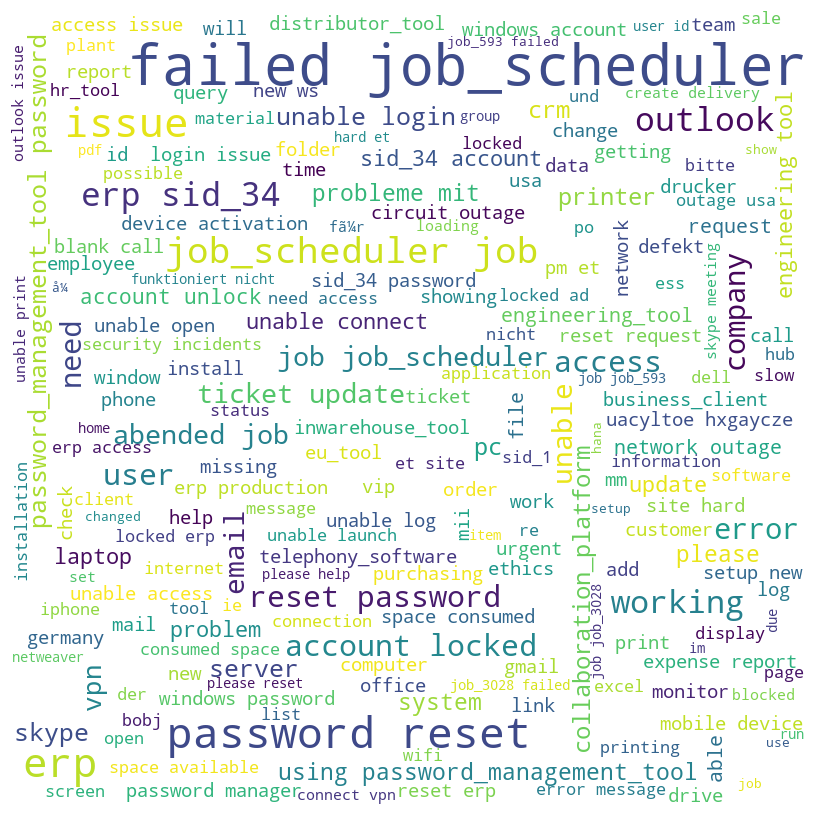

In [11]:
#Word cloud for short description

wordcloud_short_desc = show_word_cloud(incidents_data['Short description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_short_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#ToDo Observation from word cloud

In [12]:
# Print the counts for unique values of Description
incidents_data["Description"].value_counts()

the                                                                                                                                                                                                                                                                                                   56
windows password reset                                                                                                                                                                                                                                                                                29
password reset                                                                                                                                                                                                                                                                                        26
windows account locked                                                                                       

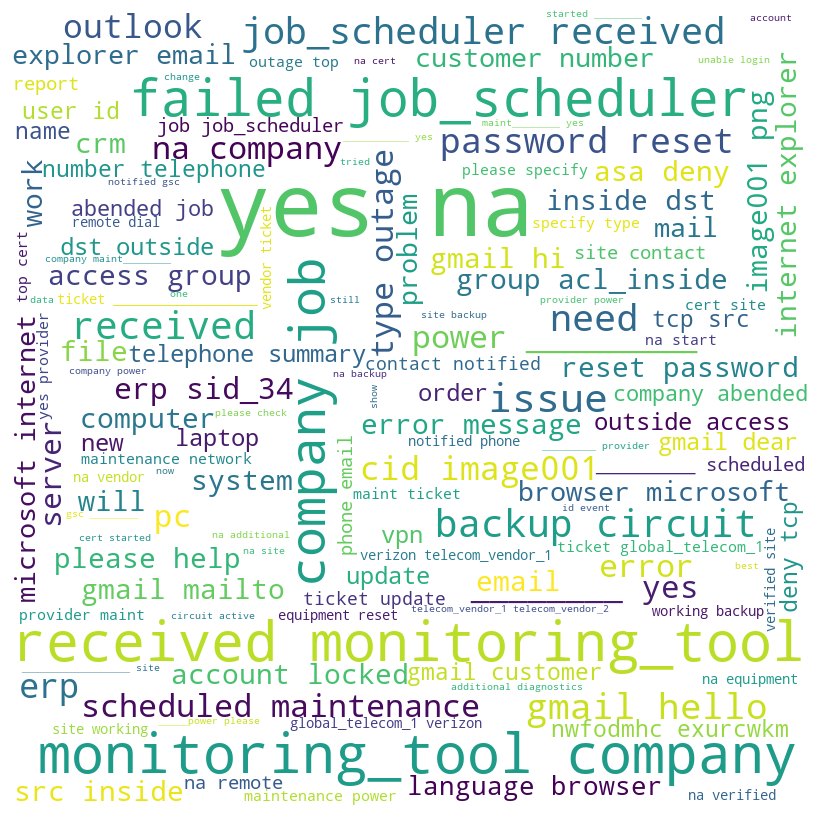

In [13]:
#Word cloud for description

wordcloud_desc = show_word_cloud(incidents_data['Description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [14]:
# Print the counts for unique values of Caller
caller_counts = incidents_data["Caller"].value_counts().reset_index()
top_ten_callers = caller_counts[:11].copy()

In [15]:
#Caller Counts
print ( "All Caller Counts")
caller_counts


All Caller Counts


,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
...,...,...
2945,ioebfyud olfmydhn,1
2946,nfybpxdg yjtdkfuo,1
2947,szockfpj izohlgcq,1
2948,pifyudbo tagsfbny,1


In [16]:
#Caller Counts
print ( "Top Ten Callers")
top_ten_callers

Top Ten Callers


,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
5,jloygrwh acvztedi,64
6,spxqmiry zpwgoqju,63
7,oldrctiu bxurpsyi,57
8,olckhmvx pcqobjnd,54
9,dkmcfreg anwmfvlg,51


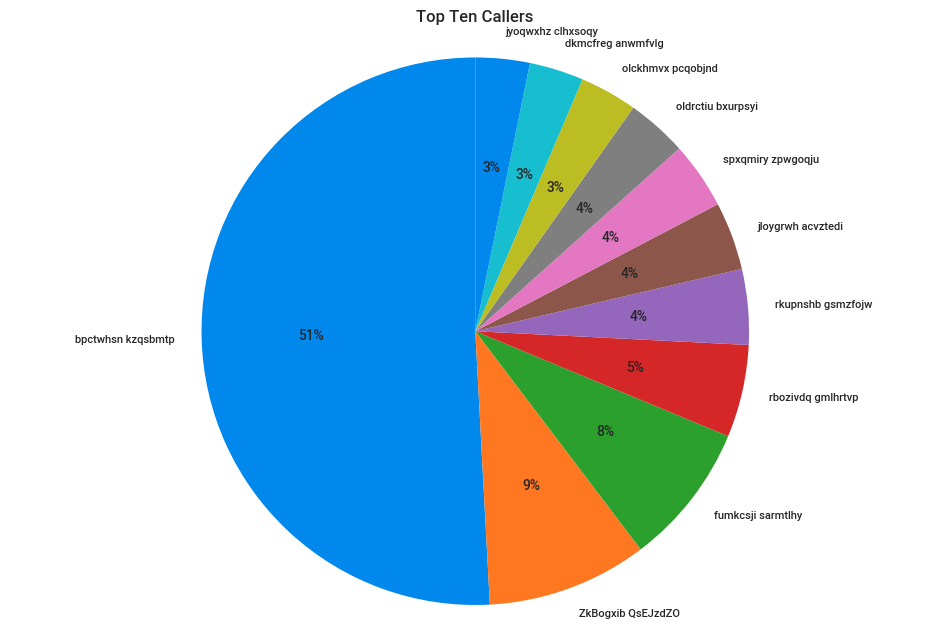

In [17]:
# Pie chart for top 10 callers
plt.figure(figsize=(12,8))
plt.pie(top_ten_callers['Caller'], labels=top_ten_callers['index'],autopct='%1.0f%%',startangle=90)
plt.title("Top Ten Callers")
plt.axis('equal')
plt.show()


From Above we see that 51% of requests are from Caller "bpctwhsn kzqsbmtp". May be this user needs some training or lets see if there is some other issue.

In [18]:
# Print the counts for unique values of Assignment Group
incidents_data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_67       1
GRP_73       1
GRP_64       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

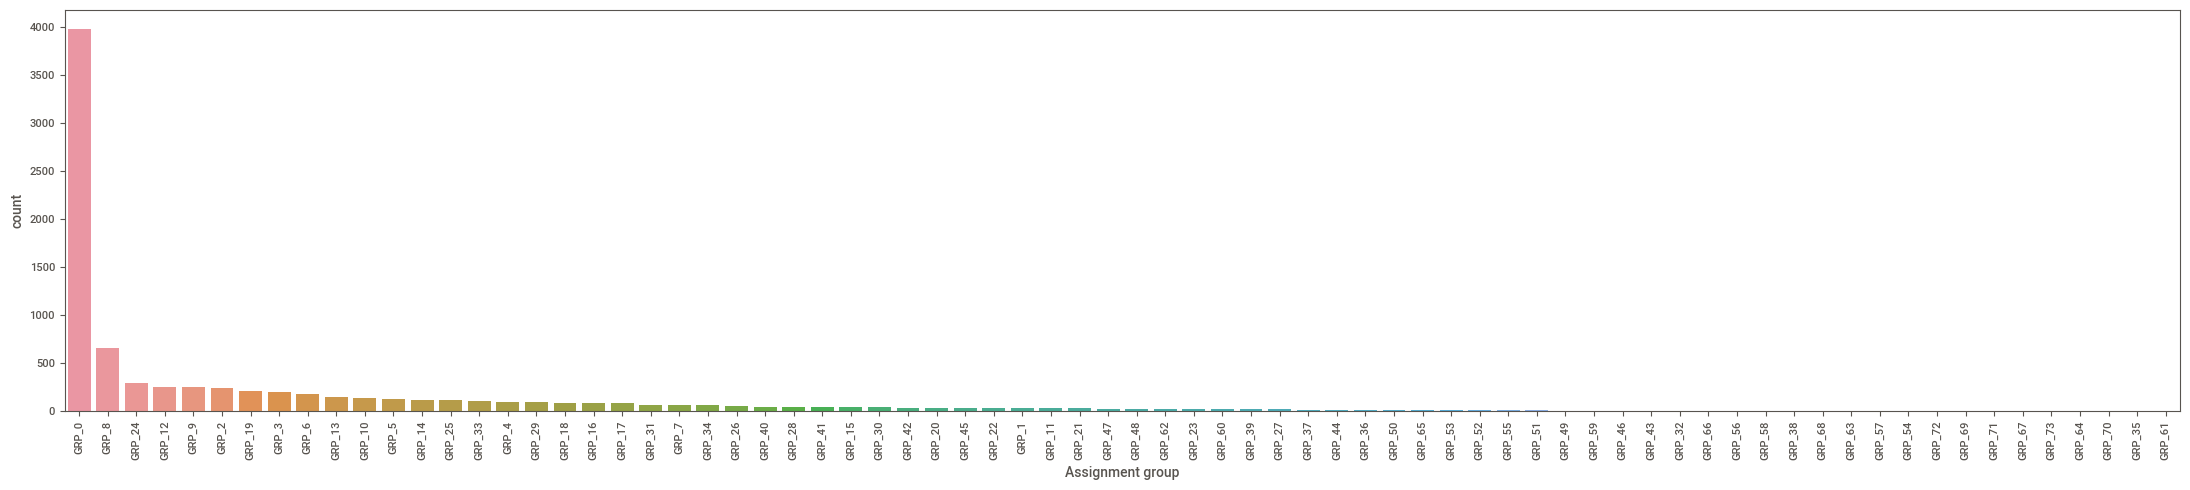

In [19]:
#Visualizing imbalance in the target class to find what all are smallest groups that can be merged to reduce total number of classification classes.
plt.figure(figsize=(22,5))
sortOrder = incidents_data['Assignment group'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Assignment group', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [20]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=30)
print("No of Assignment groups with less than or equal to 30 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 30 tickets 40


We shall see the assignment group distribution 

In [21]:
ticket_excluded_grp = ['GRP_0','GRP_8']
ticket_excluded_grp.extend(ticket_selected_grp['Assignment group'].unique())

ticket_excluded_grps = incidents_data[~incidents_data['Assignment group'].isin(ticket_excluded_grp)]

ticket_assigned_grp = pd.DataFrame(ticket_excluded_grps.groupby('Assignment group').size(),columns=['Count']).reset_index()


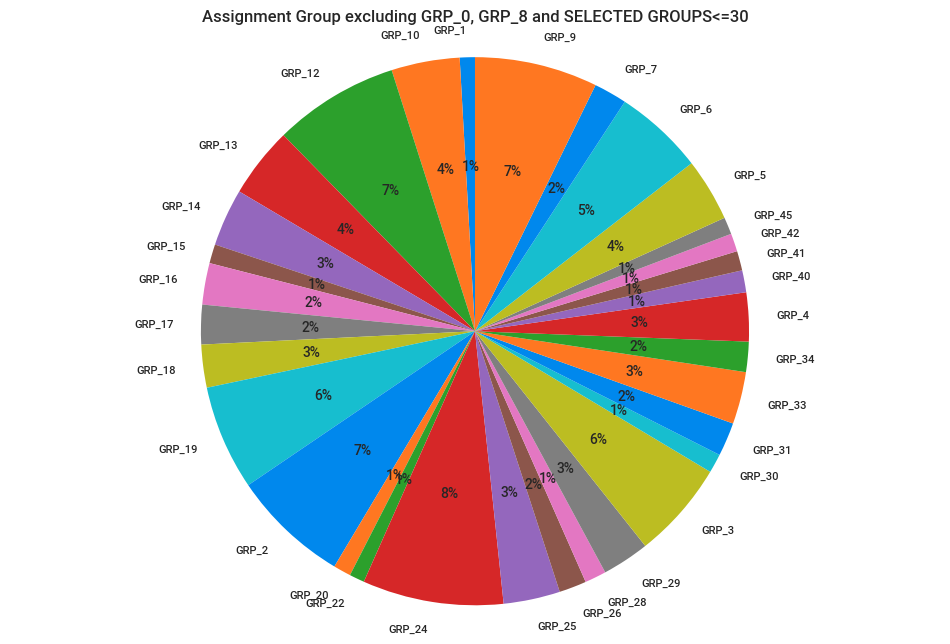

In [22]:
plt.figure(figsize=(12,8))
plt.pie(ticket_assigned_grp.Count,labels=ticket_assigned_grp['Assignment group'],autopct='%1.0f%%',startangle=90)
plt.title("Assignment Group excluding GRP_0, GRP_8 and SELECTED GROUPS<=30")
plt.axis('equal')
plt.show()


In [23]:
incidents_data_counts = incidents_data['Assignment group'].value_counts().reset_index()

In [24]:
incidents_data_counts.head()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252


We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-30 tickets
6. 31-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [25]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 2 )& (incidents_data_counts['Assignment group'] < 9 )])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 8)& (incidents_data_counts['Assignment group'] < 15 )])}
_15_30_tickets = {'No. of tickets':' 15-30 ticket',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 14)& (incidents_data_counts['Assignment group'] < 31 )])}      
_31_50_tickets = {'No. of tickets':' 31-50 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 30)& (incidents_data_counts['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 50)& (incidents_data_counts['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 100)& (incidents_data_counts['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 200)& (incidents_data_counts['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_30_tickets,_31_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-30 ticket                       12
5     31-50 tickets                       10
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


There are total of 40 Assignment groups which have tickets less than  or equal to 30. Lets see the if we can combine the assignment groups having few tickets and reduce the number of classes for classification. 

For this we shall also check if the same kind of issues are handled by other assignment groups in further analysis with which will be a deciding factor to merge the classes.

Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

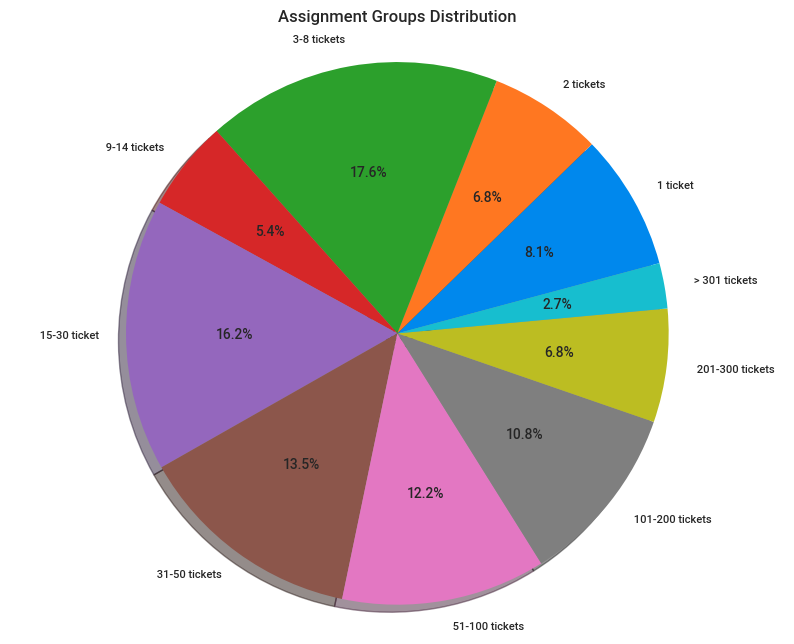

In [26]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_bins['No. of Assignment groups'],labels=ticket_bins['No. of tickets'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [27]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=2)
print("No of Assignment groups with less than or equal to 2 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 2 tickets 11


In [28]:
assignment_group_ticket_counts = incidents_data_counts[incidents_data_counts['index'].isin(ticket_selected_grp['Assignment group'])]

In [29]:
assignment_group_ticket_counts

,index,Assignment group
63,GRP_57,2
64,GRP_54,2
65,GRP_72,2
66,GRP_69,2
67,GRP_71,2
68,GRP_35,1
69,GRP_70,1
70,GRP_67,1
71,GRP_73,1
72,GRP_64,1


The groups which gets either 1 or 2 tickets are as we see above:
1. GRP_57
2. GRP_71
3. GRP_72
4. GRP_54
5. GRP_69
6. GRP_64
7. GRP_73
8. GRP_61
9. GRP_70
10. GRP_67
11. GRP_35

Let's see if the tickets to these groups can also be handled by some other assignment groups. May be then we can ignore those groups and reduce the classes.

In [30]:
incidents_data[incidents_data['Assignment group']=='GRP_57']['Short description']

1886    i cannot access the dob report.  i was able to...
6839    job Job_1148 failed in job_scheduler at: 08/22...
Name: Short description, dtype: object

In [31]:
groups = incidents_data["Short description"].str.contains("job_scheduler").reset_index()

In [32]:
group_desc = groups[groups['Short description'] == True]

group_desc

,index,Short description
47,47,True
50,50,True
59,59,True
60,60,True
67,67,True
...,...,...
8442,8442,True
8448,8448,True
8460,8460,True
8462,8462,True


In [33]:
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

GRP_8     418
GRP_9     184
GRP_6     117
GRP_5     114
GRP_10     63
GRP_60     13
GRP_47     12
GRP_45      8
GRP_12      8
GRP_1       7
GRP_13      4
GRP_29      3
GRP_18      3
GRP_14      3
GRP_57      1
GRP_44      1
Name: Assignment group, dtype: int64

We see from above that **GRP_57 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_57 are assigned to

In [34]:
print(incidents_data[incidents_data['Assignment group']=='GRP_71']['Short description'])


7597                     na production files not received
8099    emea files not processed as per schedule - che...
Name: Short description, dtype: object


In [35]:
groups = incidents_data["Short description"].str.contains("files not").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7597   7597              True
8099   8099              True


GRP_71    2
Name: Assignment group, dtype: int64

We see from above that **GRP_71 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_71 are assigned to

In [36]:
print(incidents_data[incidents_data['Assignment group']=='GRP_72']['Short description'])


7828                                      account locked.
8387    ticket (ticket_no1538972) update to anftgup nf...
Name: Short description, dtype: object


In [37]:
groups = incidents_data["Short description"].str.contains("account locked").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
18       18              True
27       27              True
54       54              True
81       81              True
165     165              True
...     ...               ...
8267   8267              True
8268   8268              True
8367   8367              True
8458   8458              True
8489   8489              True

[184 rows x 2 columns]


GRP_0     181
GRP_34      1
GRP_72      1
GRP_2       1
Name: Assignment group, dtype: int64

We see from above that **GRP_72 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_72 are assigned to

In [38]:
print(incidents_data[incidents_data['Assignment group']=='GRP_54']['Short description'])

1637    receiving product in logical warehouse (plant_...
2983    question  -  who is taking care on report zzsd...
Name: Short description, dtype: object


In [39]:
groups = incidents_data["Short description"].str.contains("warehouse").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
215     215              True
329     329              True
504     504              True
685     685              True
935     935              True
...     ...               ...
8030   8030              True
8035   8035              True
8038   8038              True
8044   8044              True
8192   8192              True

[81 rows x 2 columns]


GRP_13    30
GRP_8     14
GRP_0      9
GRP_10     8
GRP_18     5
GRP_20     3
GRP_29     2
GRP_7      2
GRP_4      2
GRP_2      1
GRP_3      1
GRP_32     1
GRP_54     1
GRP_19     1
GRP_25     1
Name: Assignment group, dtype: int64

We see from above that **GRP_54 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_54 are assigned to

In [40]:
print(incidents_data[incidents_data['Assignment group']=='GRP_69']['Short description'])

5843              'repeat outbound connection for 135/tcp
7154    security incidents - ( #in33417637 ) : repeat ...
Name: Short description, dtype: object


In [41]:
groups = incidents_data["Short description"].str.contains("connection").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
73       73              True
323     323              True
522     522              True
575     575              True
763     763              True
...     ...               ...
7589   7589              True
7632   7632              True
7835   7835              True
7870   7870              True
8247   8247              True

[66 rows x 2 columns]


GRP_0     29
GRP_4      6
GRP_2      6
GRP_19     5
GRP_31     5
GRP_3      4
GRP_69     2
GRP_8      2
GRP_30     1
GRP_28     1
GRP_53     1
GRP_1      1
GRP_55     1
GRP_50     1
GRP_45     1
Name: Assignment group, dtype: int64

We see from above that **GRP_69 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_69 are assigned to

In [42]:
print(incidents_data[incidents_data['Assignment group']=='GRP_64']['Short description'])

3628    r: ticket_no1402627 change in report zsdslsum ...
Name: Short description, dtype: object


In [43]:
groups = incidents_data["Short description"].str.contains("change in report").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3628   3628              True


GRP_64    1
Name: Assignment group, dtype: int64

We see from above that **GRP_71 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_71 are assigned to

In [44]:
print(incidents_data[incidents_data['Assignment group']=='GRP_73']['Short description'])

8197    oneteam sso not working
Name: Short description, dtype: object


In [45]:
groups = incidents_data["Short description"].str.contains("oneteam").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7967   7967              True
8197   8197              True
8211   8211              True
8478   8478              True


GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

We see from above that **GRP_73 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_73 are assigned to

In [46]:
print(incidents_data[incidents_data['Assignment group']=='GRP_61']['Short description'])

3036    (srvlavpwdrprd01.company.company.com) is not r...
Name: Short description, dtype: object


In [47]:
groups = incidents_data["Short description"].str.contains("srvlavpwdrprd01").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3036   3036              True


GRP_61    1
Name: Assignment group, dtype: int64

We see from above that **GRP_61 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_61 are assigned to

In [48]:
print(incidents_data[incidents_data['Assignment group']=='GRP_70']['Short description'])

6401    a link on an e-mail says i am "forbidden"
Name: Short description, dtype: object


In [49]:
groups = incidents_data["Short description"].str.contains("forbidden").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6401   6401              True


GRP_70    1
Name: Assignment group, dtype: int64

We see from above that **GRP_70 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_70 are assigned to

In [50]:
print(incidents_data[incidents_data['Assignment group']=='GRP_67']['Short description'])

5154    unable to complete forecast
Name: Short description, dtype: object


In [51]:
groups = incidents_data["Short description"].str.contains("forecast").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
2419   2419              True
2425   2425              True
5154   5154              True
7328   7328              True
7403   7403              True


GRP_22    3
GRP_67    1
GRP_40    1
Name: Assignment group, dtype: int64

We see from above that **GRP_67 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_67 are assigned to

In [52]:
print(incidents_data[incidents_data['Assignment group']=='GRP_35']['Short description'])

401    need access to erp kp06789
Name: Short description, dtype: object


In [53]:
groups = incidents_data["Short description"].str.contains("erp").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6         6              True
18       18              True
25       25              True
29       29              True
36       36              True
...     ...               ...
8453   8453              True
8454   8454              True
8459   8459              True
8488   8488              True
8493   8493              True

[879 rows x 2 columns]


GRP_0     591
GRP_2      55
GRP_14     34
GRP_13     20
GRP_10     15
GRP_15     11
GRP_18     10
GRP_24     10
GRP_8       9
GRP_9       9
GRP_25      8
GRP_11      8
GRP_45      7
GRP_5       7
GRP_29      7
GRP_40      6
GRP_3       6
GRP_19      6
GRP_4       5
GRP_41      5
GRP_6       5
GRP_20      4
GRP_42      4
GRP_31      4
GRP_28      3
GRP_30      3
GRP_53      3
GRP_1       3
GRP_47      3
GRP_21      2
GRP_52      2
GRP_49      2
GRP_44      2
GRP_33      2
GRP_59      2
GRP_46      1
GRP_16      1
GRP_61      1
GRP_12      1
GRP_35      1
GRP_26      1
Name: Assignment group, dtype: int64

We see from above that **GRP_35 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_35 are assigned to

So finally, we see that below groups can be ignored based on above analysis. We will decide this later after feature engineering
1. GRP_72
2. GRP_54
3. GRP_57
4. GRP_69
5. GRP_67
6. GRP_35
7. GRP_73

But, we shall not ignore below assignment groups:
1. GRP_71
2. GRP_70
3. GRP_61
4. GRP_64

## 3.3 FEATURE ENGINEERING

### 3.3.1 CHECKING NULL VALUES

In [54]:
# Print the null values from data
incidents_data[incidents_data.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


### 3.3.2 NULL VALUE TREATEMENT STRATEGIES

We see there are arond 9 records with null values. Hence we can use below strategies to replace null values:
1. Drop the records with null values
2. Replace null value (NaN) with empty string
3. Look for same description in any other record and then replace the corresponding shor description or in case of description has null value then search for same short description and replace description with corresponding description

We will go with approach 2 here that we will replace the null values with empty string. This is because we do not want to loose descriptions with dropping and with approach 3 we might end up creating further duplicates inside.

So let's replce NaN with empty strings

### 3.3.3 REPLACING NULL VALUES WITH BLANK

In [55]:
# Replace null(NaN) values from short description and descriptions
incidents_data['Short description'] = incidents_data['Short description'].replace(np.nan, '', regex=True)
incidents_data['Description'] = incidents_data['Description'].replace(np.nan, '', regex=True)

### 3.3.4 CHECKING NULL VALUES AFTER TREATEMENT

In [56]:
# Print the null values from data
incidents_data.isnull().count()

Short description    8500
Description          8500
Caller               8500
Assignment group     8500
dtype: int64

So, as we expected there is no null values inside our dataset now

Now, let's add another column to calculate the percentage of data in each assignment group

We also saw  during analysis that there are multiple scripts inside and also latin characters. Let's see if we have texts from different langauges. For this first we shall create only single column for both short description and description and Name it as Ticket_description

### 3.3.5 CONCATENATING SHORT DESCRIPTION AND DESCRIPTION AS TICKET_DESCRIPTION

In [57]:
# Concatenate Short Description and Description columns into new column known as Ticket_Details
incidents_data['Ticket_Description'] = incidents_data['Short description'] + ' ' +incidents_data['Description']

In [58]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


A new column Ticket_Description is added now. Let us see how many langauges are used in the description. For this lets first let's fix the mojibake characters so that we can easily send for langauge detection

For this we shall use ftfy library

### 3.3.6 FIX ENCODING

In [59]:
!pip install ftfy

     |████████████████████████████████| 71kB 2.7MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41916 sha256=95fc0f38490a1866d9917be058e54fb4f6f96cd357eb8e05b8efb81fa66b65c4
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy


In [60]:
import ftfy

In [61]:
def fix_mojibake_text(dataframe,description_column):
  fixed_text = []
  for column in dataframe[[description_column]]:
    # Select column contents by column name using [] operator
    Text = dataframe[column]
    print('Text : ', len(Text))
    for i in range(len(Text)) :
      #print(i)
      fix_text_i = ftfy.fix_text(Text.values[i])
      fixed_text.append(fix_text_i)
    return fixed_text

In [62]:
incidents_data['Fixed_text'] = fix_mojibake_text(incidents_data, 'Ticket_Description')

Text :  8500


In [63]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error


In [64]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Ticket_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Ticket_Description, Length: 289, dtype: object

In [65]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Fixed_text

222     support für fa.gstry \arexjftu ohxdwngl suppor...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \überprüfung \niptbwdq csenj...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Fixed_text, Length: 289, dtype: object

From above we can see that the Mojibake texts are now fixed. Now let's see which all languages are there is dataframe.

For this we will use langdetect library

### 3.3.7 DETECTING LANGAUGE

In [66]:
!pip install langdetect

     |████████████████████████████████| 983kB 3.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=2235be9ec9467c926b753b4fd1ffe8cf512a14f4454fafa272c48b46695e7468
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [67]:
from langdetect import detect

In [68]:
def language_detector(dataframe):
  try:
    language = detect(dataframe)
    return language
  except:
    return 'Language could not be detected'

In [69]:
incidents_data['Language'] = incidents_data['Fixed_text'].apply(language_detector)

In [70]:
incidents_data['Language'].value_counts()

en       7093
de        416
af        263
it        125
fr        110
nl         71
no         71
sv         48
zh-cn      47
es         43
ca         42
pl         28
da         25
pt         19
ko         19
tl         12
ro         11
et         11
cy         10
sq          9
hr          7
sl          6
fi          3
vi          3
id          3
lt          2
tr          1
cs          1
so          1
Name: Language, dtype: int64

Above we see that most of the descriptions are in English langauge followed by German

In [71]:
!pip install google_trans_new

In [73]:

from google_trans_new import google_translator  
import requests
import json
import pickle

In [80]:
def translate_to_english(dataframe,description_column, language_column,language):
  english_text = []
  for column in dataframe[[description_column, language_column]]:
    # Select column contents by column name using [] operator
    Text = dataframe[column]
    print('Text : ', Text[0])
    

In [79]:
translated_to_english = translate_to_english(incidents_data,'Fixed_text','Language', 'en')
print(translated_to_english)

Text :  0       login issue -verified user details.(employee# ...
1       outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2       cant log in to vpn \n\nreceived from: eylqgodm...
3       unable to access hr_tool page unable to access...
4                               skype error  skype error 
                              ...                        
8495    emails not coming in from zz mail \n\nreceived...
8496    telephony_software issue telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    machine não está funcionando i am unable to ac...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Fixed_text, Length: 8500, dtype: object
Text :  0       en
1       en
2       en
3       en
4       no
        ..
8495    en
8496    en
8497    en
8498    en
8499    de
Name: Language, Length: 8500, dtype: object
None


In [81]:
with open('english text.pkl', 'rb') as f:
  mynewlist = pickle.load(f)

In [82]:
mynewlist

['login issue -verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.',
 'outlook \n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind ',
 'cant log in to vpn \n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest ',
 'unable to access hr_tool page unable to access hr_tool page',
 'skype error  skype error ',
 'unable to log in to engineering tool and skype unable to log in to engineering tool and skype',
 'event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/  event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d_7/sr3psa1d.data7,perpsr3psa1d,4524 is 98',
 "t

## 3.2 DATA PREPROCESSING 

## 3.4 TOKENIZATION
